In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We are reading our data
df = pd.read_csv("C:/Users/NEIST/Desktop/Pre/main_datasets/feature_importance_nonzero_100.csv")

In [3]:
# First 5 rows of our data
df

,MAXssNH,ATS8dv,MATS4s,MINssNH,SlogP_VSA8,NsssN,PEOE_VSA3,MATS1s,ATSC3v,GATS1se,...,piPC6,TIC5,NsssCH,GATS8v,MATS1se,SMR_VSA1,ATS6d,AATS1p,AATS4i,target
0,1.911486,37.00000,0.434966,1.828183,6.514573,0,4.794537,0.624413,0.677585,0.839738,...,5.394479,136.451830,2,0.888628,0.583146,9.843390,114,1.614025,170.323501,True
1,1.911486,570.00000,0.366367,1.828183,6.514573,0,9.740499,0.622895,0.670756,0.878124,...,6.478029,278.158203,4,1.065283,0.619973,38.322242,494,1.757999,152.980242,False
2,1.911486,677.00000,0.440137,1.828183,10.902925,1,9.184952,0.642844,0.730527,0.714820,...,6.965788,359.189245,2,0.894598,0.632082,28.929407,579,1.834005,159.715201,True
3,1.911486,609.00000,0.471647,1.828183,10.902925,1,9.184952,0.643440,0.729395,0.728963,...,6.942398,364.665349,2,0.911993,0.636223,24.134870,579,1.820291,160.166073,True
4,1.911486,705.00000,0.435364,1.828183,10.902925,1,13.979489,0.632944,0.717904,0.752570,...,6.965788,346.303973,2,0.928623,0.620295,33.666270,563,1.811911,159.522315,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,1.911486,523.92297,0.690171,1.828183,6.514573,0,9.184952,0.229887,0.695284,1.334922,...,5.947411,44.105716,1,1.022545,0.222710,28.643351,2,1.992625,188.249683,False
2354,1.911486,139.00000,0.437876,1.828183,11.163878,0,4.983979,0.516223,0.718734,1.090520,...,5.952147,161.362413,1,1.125284,0.509523,14.949918,173,1.553333,169.062438,False
2355,1.911486,6.00000,0.520652,1.828183,21.936326,0,9.967957,0.526744,0.689115,1.043889,...,6.620969,151.463962,1,1.163003,0.630821,22.938348,176,1.811649,166.616351,False
2356,1.911486,68.00000,0.507224,1.828183,11.163878,0,4.983979,0.512856,0.719229,1.035548,...,6.054256,122.381963,0,1.116907,0.463305,5.106527,94,1.625828,167.681446,False


In [4]:
df.target.value_counts()

True     1298
False    1060
Name: target, dtype: int64

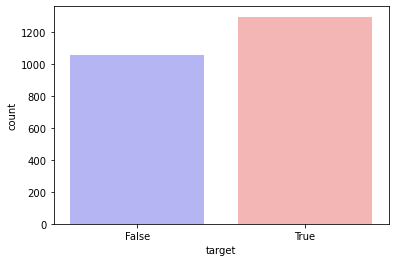

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == False])
countHaveDisease = len(df[df.target == True])
print("Percentage of values with False: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of values with True: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of values with False: 44.95%
Percentage of values with True: 55.05%


In [7]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [8]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.10,random_state=0)

In [11]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
x_val = x_val.T
y_val = y_val.T

In [12]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
predictions = nb.predict(x_test.T)
predictions_tr = nb.predict(x_train.T)
acc = nb.score(x_test.T,y_test.T)*100
acc_tr =nb.score(x_train.T,y_train.T)*100
print(acc)
print(acc_tr)
predictions_val = nb.predict(x_val.T)
acc_val =nb.score(x_val.T,y_val.T)*100
print(acc_val)

76.48305084745762
76.25220978196819
76.19047619047619


In [13]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=nb, X=x_train.T, y=y_train.T, cv=10)
print(accuracies)
print(accuracies.mean())

[0.77647059 0.77058824 0.72352941 0.75882353 0.74117647 0.70588235
 0.77647059 0.76923077 0.79289941 0.76331361]
0.7578384963452837


In [14]:
cf =(confusion_matrix(y_test, predictions))
cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_train, predictions_tr))
print(classification_report(y_train, predictions_tr))
print(confusion_matrix(y_val, predictions_val))
print(classification_report(y_val, predictions_val))

[[165  45]
 [ 66 196]]
              precision    recall  f1-score   support

       False       0.71      0.79      0.75       210
        True       0.81      0.75      0.78       262

    accuracy                           0.76       472
   macro avg       0.76      0.77      0.76       472
weighted avg       0.77      0.76      0.77       472

[[603 163]
 [240 691]]
              precision    recall  f1-score   support

       False       0.72      0.79      0.75       766
        True       0.81      0.74      0.77       931

    accuracy                           0.76      1697
   macro avg       0.76      0.76      0.76      1697
weighted avg       0.77      0.76      0.76      1697

[[64 20]
 [25 80]]
              precision    recall  f1-score   support

       False       0.72      0.76      0.74        84
        True       0.80      0.76      0.78       105

    accuracy                           0.76       189
   macro avg       0.76      0.76      0.76       189
weighted 

In [15]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.5306756276821181

In [16]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, predictions_val)

0.5214500094539749

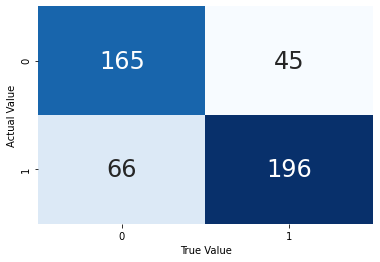

In [17]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
cf_plt

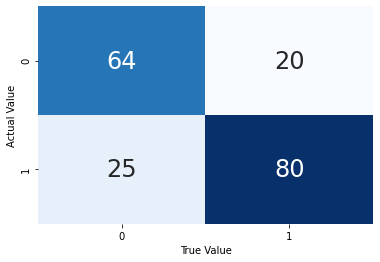

In [18]:
cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
cf_plt